# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
df = pd.read_csv('Data/stroke.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Cleaning

In [3]:
# deleting unnecessary columns
# deleteing id column as it's a unique identifier.
df.drop(columns='id', inplace=True)

In [4]:
# addressing missing values in bmi column.
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

From the statistic information of the bmi column, we can see that the best way of addressing the missing values is to fill the missing values with the mean of the all the values.

In [5]:
mean = df['bmi'].mean()
df['bmi'].fillna(mean, inplace=True)

In [6]:
# checking the info of the cleaned dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


# Visuals for EDA

## Univariate Visuals

Explore the distribution of each column of data!

In [11]:
def bar_charts(data, x, y, figsize=(10,5), despine=True):
    counts = df[x].value_counts().sort_values()
    
    fig, ax = plt.subplots(figsize=figsize)
    
    
    sns.barplot(data=df, x=counts.index, y=counts.values, ax=ax)
    ax.set_title(f'Distribution of {y}',
                fontsize='x-large',y=1.1,
                fontweight='semibold');
    
    ax.set_xlabel(ax.xaxis.get_label().get_text(),
                fontsize='large')
    
    ax.set_ylabel(ax.yaxis.get_label().get_text(),
                fontsize='large')
    

       
    
    for bar in ax.patches:
         ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), 
                 ha='center', va='center', 
                   size=10, fontfamily='serif',
              xytext=(0, 8), 
                   textcoords='offset points')
    ax.set_ylim(top=ax.get_ylim()[-1]+5)
   
    
    if despine:
       
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
    

    plt.tight_layout()  
    
    return fig,ax

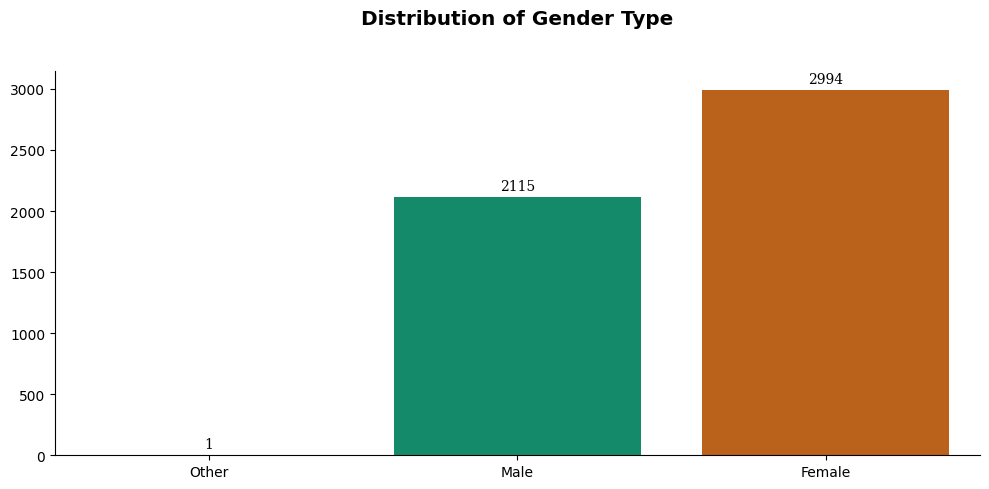

In [18]:
# Distribution of gender.
with plt.style.context('seaborn-colorblind'):
    gender_fig, ax = bar_charts(df, 'gender', 'Gender Type')

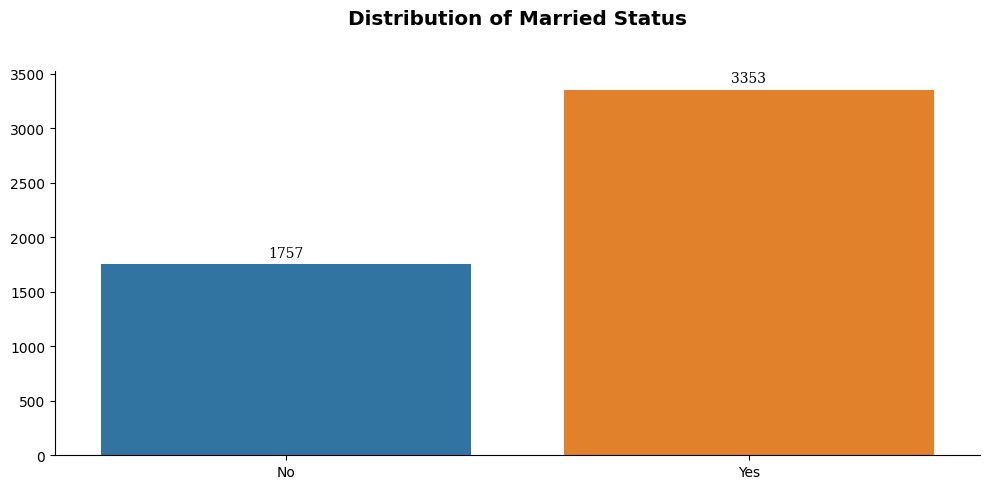

In [20]:
# distribution of ever-married.
married_fig, ax = bar_charts(df, 'ever_married', 'Married Status')

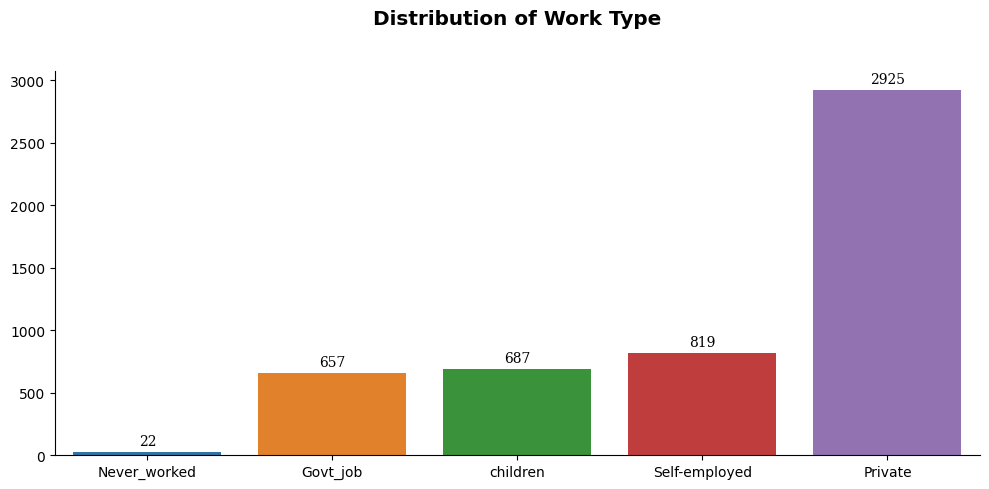

In [26]:
# distribution of work-type.
work_fig, ax = bar_charts(df, 'work_type', 'Work Type')


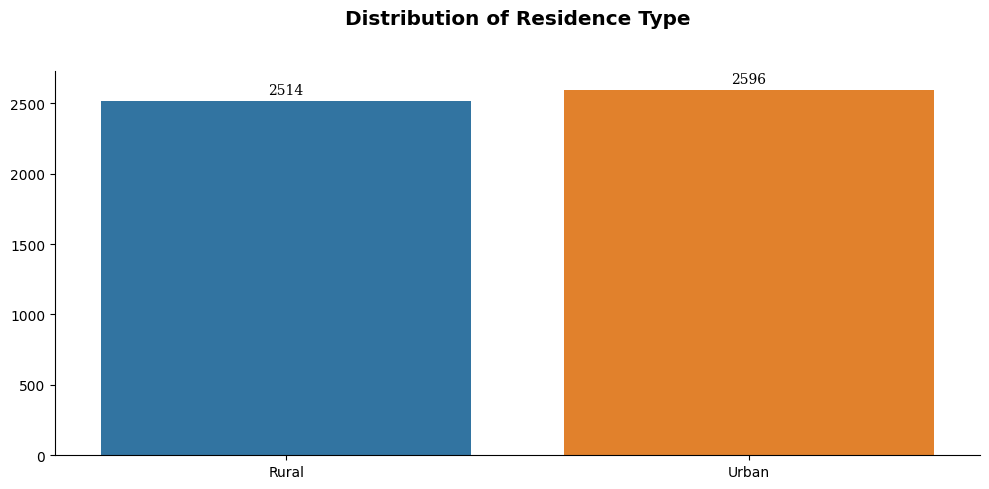

In [27]:
# distribution of Residence-type.
residence_fig, ax = bar_charts(df, 'Residence_type', 'Residence Type')

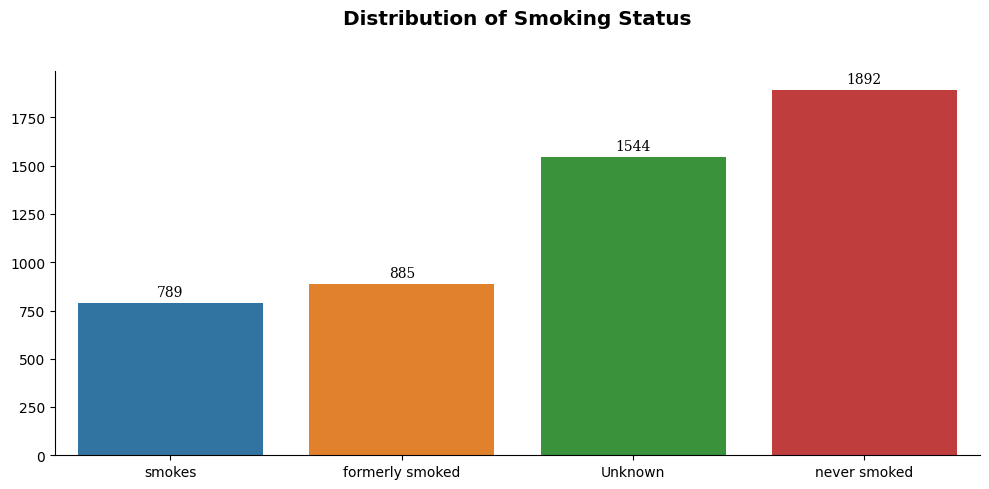

In [28]:
# distribution of smoking status.
residence_fig, ax = bar_charts(df, 'smoking_status', 'Smoking Status')

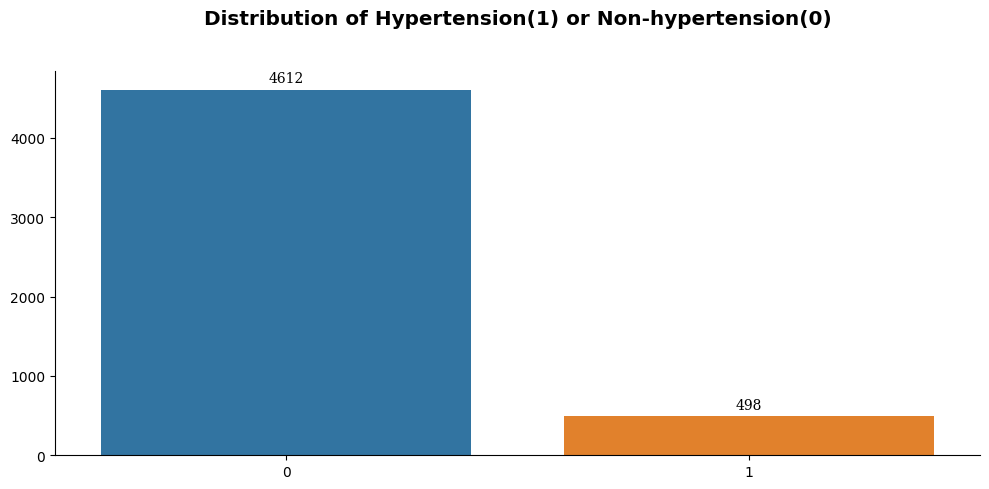

In [31]:
# distribution of hypertension.
hypertension_fig, ax = bar_charts(df, 'hypertension', 'Hypertension(1) or Non-hypertension(0)')

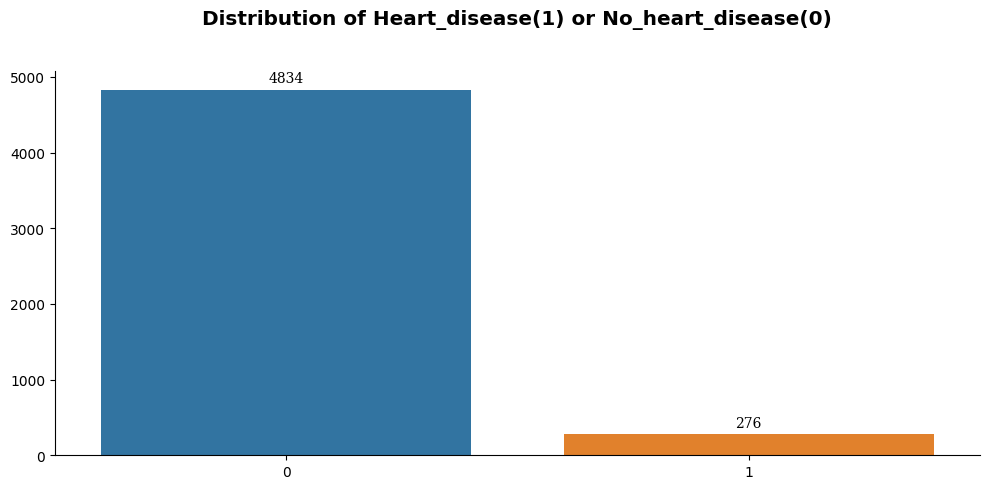

In [32]:
# distribution of hypertension.
heart_disease_fig, ax = bar_charts(df, 'heart_disease', 'Heart_disease(1) or No_heart_disease(0)')

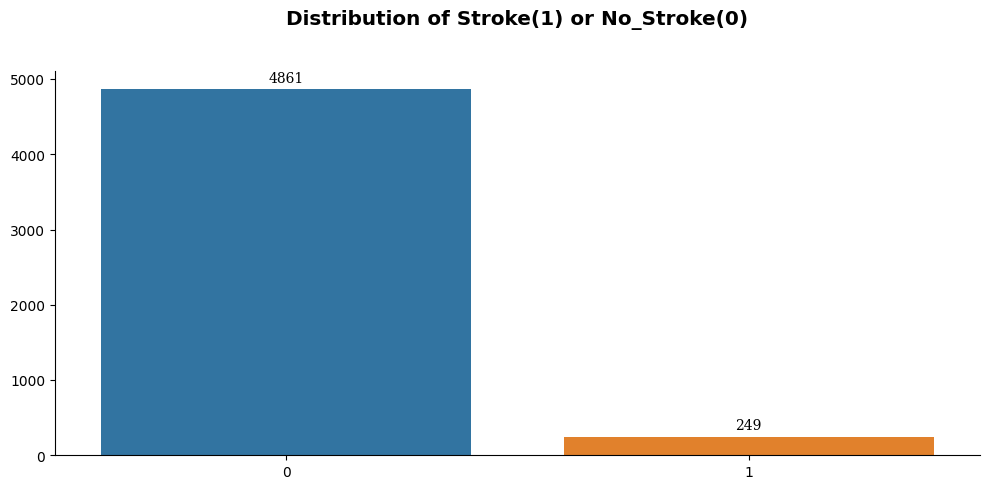

In [33]:
# distribution of stroke.
stroke_fig, ax = bar_charts(df, 'stroke', 'Stroke(1) or No_Stroke(0)')

In [64]:
## Slicing the age to 4 groups.

df60 = df['age']>=60
age_60 = df.loc[df60]

dfnon60 = df.loc[~df60]
df40 = dfnon60['age']>=40
age_40 = dfnon60.loc[df40]

dfnon40 = dfnon60.loc[~df40]
df20 = dfnon40['age']>=20
age_20 = dfnon40.loc[df20]

dfnon20 = dfnon40.loc[~df20]
dfless20 = dfnon20['age']<20
age_less20 = dfnon20.loc[dfless20]

print(f'- Age above 60: {len(age_60)}.')
print(f'- Age between 40 and 60: {len(age_40)}.')
print(f'- Age between 20 and 40: {len(age_20)}.')
print(f'- Age below 20: {len(age_less20)}.')




- Age above 60: 1376.
- Age between 40 and 60: 1564.
- Age between 20 and 40: 1204.
- Age below 20: 966.


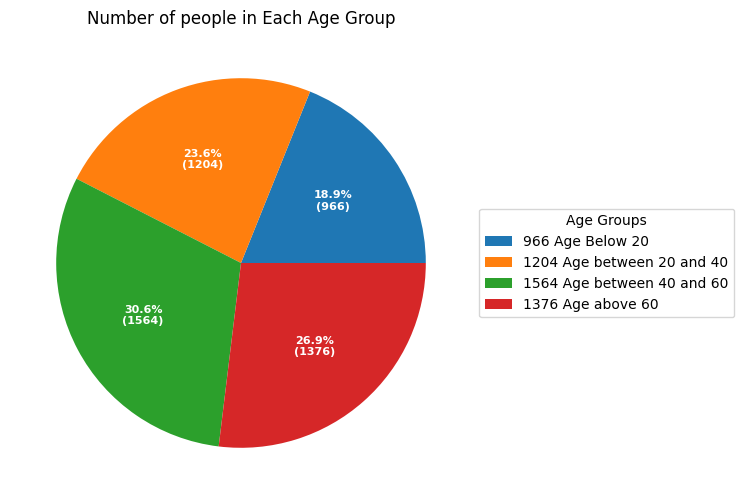

In [68]:
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

age_groups = ["966 Age Below 20",
          "1204 Age between 20 and 40",
          "1564 Age between 40 and 60",
          "1376 Age above 60"]

data = [float(x.split()[0]) for x in age_groups]
age_group = [x.split()[-1] for x in age_groups]



def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, age_groups,
          title="Age Groups",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Number of people in Each Age Group")

plt.show()

In [52]:
def plot_hist(data,x,y,
              despine=True):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=(10,5))

    ## Plot histogram
    sns.histplot(data=df,x=x,ax=ax)
    ax.set_title(f'Distribution of {y}',
                 fontsize='x-large',y=1.1);


    ## Annotating mean and median
    mean = df[x].mean()
    ax.axvline(mean,color='slategray', ls='--', lw=3,
            label=f"Mean {x} = ${mean:,.2f}");

    median = df[x].median()
    ax.axvline(median,color='skyblue', ls=':', lw=3,
            label=f"Median {x} = ${median:,.2f}");


    ## Increasing Axis Label Font Sizes
    ax.set_xlabel(ax.xaxis.get_label().get_text(),
                fontsize='large')
    ax.set_ylabel(ax.yaxis.get_label().get_text(),
                fontsize='large')


    if despine:
        ## removing top and right border
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

    ## add a legend        
    ax.legend()

    return fig,ax

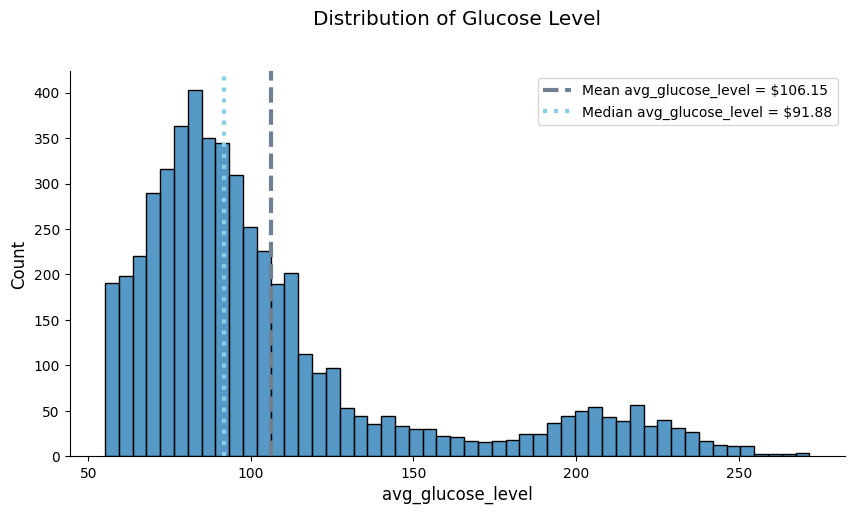

In [70]:
glucose_fig, ax = plot_hist(df, 'avg_glucose_level', 'Glucose Level')

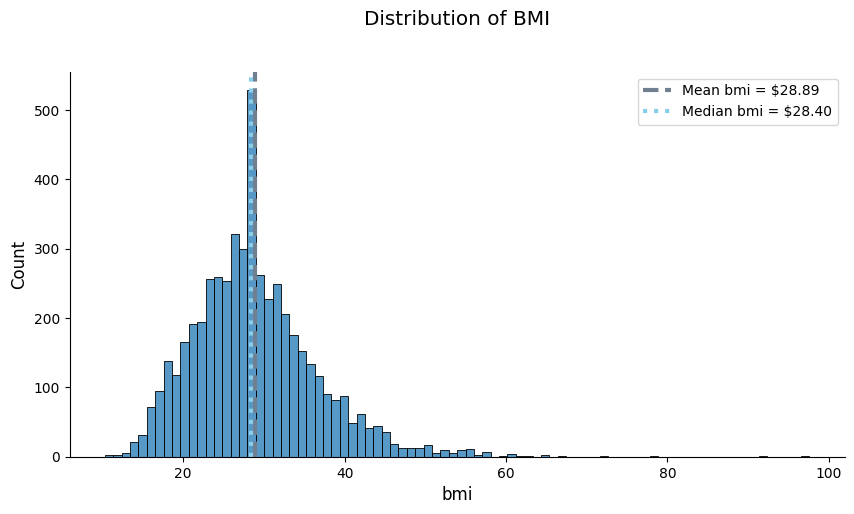

In [71]:
bmi_fig, ax = plot_hist(df, 'bmi', 'BMI')

### Identify Outliers

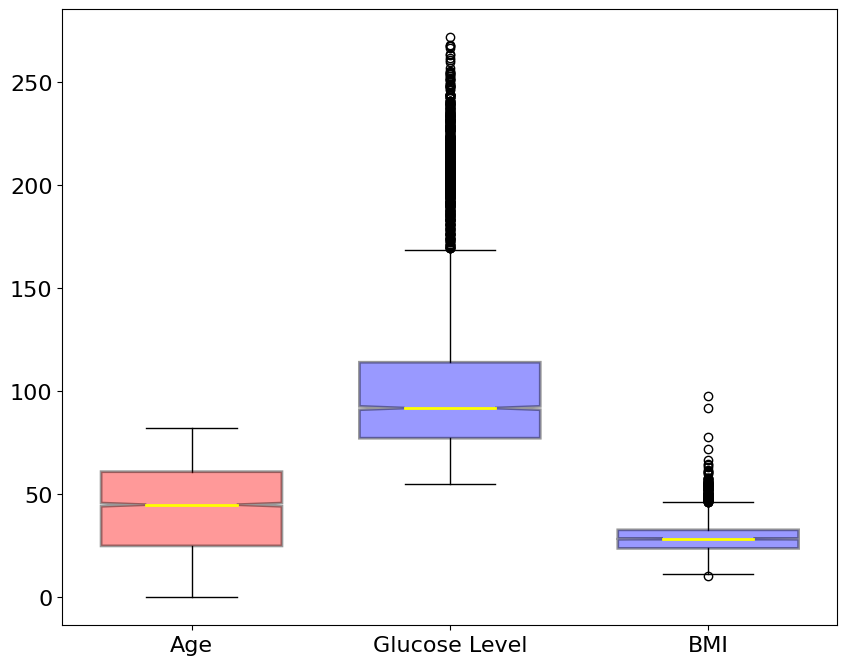

In [84]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,8))
boxplots = axes.boxplot([df['age'],df['avg_glucose_level'], df['bmi']],
           notch = True,
           labels=['Age', 'Glucose Level', 'BMI'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );

boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
boxplot2 = boxplots['boxes'][1]
boxplot2.set_facecolor('blue')
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

we can see that there are no outliers in age column, but there are a lot of outliers in glucose level and bmi columns. 